# DATA COLLECTION

In [1]:
!pip install --upgrade pip

In [2]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint


In [3]:
conda install git


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
#!pip install --user --upgrade git+https://github.com/twintproject/twint.git@master#egg=twint
#!pip uninstall -y twint
#!pip install --user git+git://github.com/ajctrl/twint@patch-1
#!pip show twint --version
    
#fixes
    #!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#!pip3 uninstall twint
#!pip3 install git+git://github.com/ajctrl/twint@patch-1
    

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\amber\appdata\local\temp\pip-install-cd121t4p\twint_de9528d4b3cc44ffad49c68031eb94ca

  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Amber\AppData\Local\Temp\pip-install-cd121t4p\twint_de9528d4b3cc44ffad49c68031eb94ca'
  Running command git checkout -q origin/master


In [5]:
#may need to use API crdentials

In [5]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Amber\anaconda3

  added / updated specs:
    - missingno


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.1.19-~ --> conda-forge/label/gcc7::ca-certificates-2018.10.15-ha4d7672_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install plotly

#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [7]:
!pip install spacy

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [8]:
## Sources: 

keywords = ["Covid19","Pandemicshopping","CovidStruggle","VirusShopping"]

search_concatenation = keywords


In [9]:
search_concatenation

['Covid19', 'Pandemicshopping', 'CovidStruggle', 'VirusShopping']

In [10]:
len(search_concatenation)

4

In [11]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = s
    config.Lang = "en"
    config.Limit = 200
    config.Since = "2020-04-01 00:00:00"
    config.Until = "2020-04-09 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
#print(Tweets_df)   
    
# see pd.concat documentation for more info
df1 = pd.concat(df).sort_values(by=['date']).reset_index()
print(df1)

#print(len(df))

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
     index                   id      conversation_id    created_at  \
0       31  1245160996739694592  1245160996739694592  1.585704e+12   
1       30  1245223579249258497  1245223579249258497  1.585719e+12   
2       29  1245325802448642050  1243145723400654850  1.585744e+12   
3       28  1245325841304821761  1245325841304821761  1.585744e+12   
4       27  1245369304050216961  1245369304050216961  1.585754e+12   
..     ...                  ...                  ...           ...   
227      4  1247675517282562049  1247675517282562049  1.586304e+12   
228      3  1247675520617271305  1247675520617271305  1.586304e+12   
229      2  1247675520889655297  1247675520889655297  1.586304e+12   
230      1  1247675521124782080  1247675521124782080  1.5

In [12]:
#outputs number of rows and columns 
df1.shape

(232, 39)

In [13]:
# with this command I'm checking 
df1.groupby('search').sum().shape, len(search_concatenation)


((2, 9), 4)

In [14]:
#Save Uncleaned Data
df1.to_csv('uncleaned_data_april9.csv')

In [15]:
df=pd.read_csv('uncleaned_data_april9.csv')

In [16]:

#am here today -jan26
##Merge all the data scraped from every week

Week1_Tweets = pd.read_csv("uncleaned_data_april9.csv")
#Week2_Tweets = pd.read_csv("tweets2.csv")

In [17]:
df=Week1_Tweets
df.head(30)

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,31,1245160996739694592,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,-400,NaN,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,30,1245223579249258497,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,-400,"{'type': 'Point', 'coordinates': [40.70542461, -73.9961493]}","the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,29,1245325802448642050,1243145723400654850,1.585744e+12,2020-04-01 08:23:02,-400,NaN,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'theimpulsivebuy', 'name': 'The Impulsive Buy', 'id': '14830715'}]",NaN,NaN,NaN,NaN
3,3,28,1245325841304821761,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,-400,NaN,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,27,1245369304050216961,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,-400,NaN,This is brilliant ..... #pandemicshopping,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,5,26,1245496407454363648,1245496407454363648,1.585784e+12,2020-04-01 19:40:58,-400,NaN,"Is it safe or even ethical to shop online during the pandemic? Amazon workers are falling sick and essentials are being prioritized, but what about Lego? Read more. #coronavirus #pandemicshopping #COVIDー19 https://t.co/DrfbDwzBEU https://t.co/R9zmmjy5IL",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,6,25,1245710337367846913,1245652862190759939,1.585835e+12,2020-04-02 09:51:03,-400,NaN,@dccampfin Well I won’t have to grocery shop again for awhile. I tried to buy enough for two weeks. Good selection at 6 am. Spent $250 - a new personal best. #PandemicShopping,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dccampfin', 'name': 'Jonathan Bernstein', 'id': '20246644'}]",NaN,NaN,NaN,NaN
7,7,24,1245787585282179072,1245787585282179072,1.585854e+12,2020-04-02 14:58:00,-400,NaN,I just went to the grocery store for bread. I ended up spending $50. #PandemicShopping,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,8,23,1245875432353705984,1245875432353705984,1.585875e+12,2020-04-02 20:47:04,-400,NaN,So - anyone else finding themselves #PandemicShopping and purchasing food items at the grocery store that you would NEVER otherwise buy? I appear to have done this my last two trips...here’s a thread:,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,9,22,1245875489312354304,1245875432353705984,1.585875e+12,2020-04-02 20:47:18,-400,NaN,"So - 1 for 3. Not the best score...but we have weeks more of this, and I am certain there’s more weird processed food out there for me to try!! What have been some of your weird #PandemicShopping food buys?",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       232 non-null    int64  
 1   index            232 non-null    int64  
 2   id               232 non-null    int64  
 3   conversation_id  232 non-null    int64  
 4   created_at       232 non-null    float64
 5   date             232 non-null    object 
 6   timezone         232 non-null    int64  
 7   place            5 non-null      object 
 8   tweet            232 non-null    object 
 9   language         232 non-null    object 
 10  hashtags         232 non-null    object 
 11  cashtags         232 non-null    object 
 12  user_id          232 non-null    int64  
 13  user_id_str      232 non-null    int64  
 14  username         232 non-null    object 
 15  name             232 non-null    object 
 16  day              232 non-null    int64  
 17  hour            

In [19]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       232 non-null    int64  
 1   index            232 non-null    int64  
 2   id               232 non-null    int64  
 3   conversation_id  232 non-null    int64  
 4   created_at       232 non-null    float64
 5   date             232 non-null    object 
 6   timezone         232 non-null    int64  
 7   place            5 non-null      object 
 8   tweet            232 non-null    object 
 9   language         232 non-null    object 
 10  hashtags         232 non-null    object 
 11  cashtags         232 non-null    object 
 12  user_id          232 non-null    int64  
 13  user_id_str      232 non-null    int64  
 14  username         232 non-null    object 
 15  name             232 non-null    object 
 16  day              232 non-null    int64  
 17  hour            

In [20]:
df.tail()

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
227,227,4,1247675517282562049,1247675517282562049,1.586304e+12,2020-04-07 19:59:58,-400,NaN,"South Australian startups: Have a confidential, unbiased conversation with experienced business leaders on the specific issues and challenges you’re facing through #COVID19 Access more information on support for business: https://t.co/k8lCwrfaaL Click to register interest 👇",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
228,228,3,1247675520617271305,1247675520617271305,1.586304e+12,2020-04-07 19:59:59,-400,NaN,#EU #regulators issue #moneylaundering warning as criminals adapt to #Covid19. https://t.co/liJwsOofaD,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
229,229,2,1247675520889655297,1247675520889655297,1.586304e+12,2020-04-07 19:59:59,-400,NaN,I started looking for assistance with our hotel 9 days ago. 211 to housing A in to #covid19 response line to @GavinNewsom 's office to @GeneralRoth 's To 211 to #Covid_19 response line (again) to @GeneralRoth to @RedCross @AuntBertha to the #Covid_19 #help !! #HelpingOthers,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
230,230,1,1247675521124782080,1247675521124782080,1.586304e+12,2020-04-07 19:59:59,-400,NaN,#COVID19 #Covid_19 Accountability #becauseofchina #becauseofWHO thousands will die and trillions will be lost,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
231,231,0,1247675521892331520,1247675521892331520,1.586304e+12,2020-04-07 19:59:59,-400,NaN,"Marketing usually advances at a rapid pace, but it has undergone a dramatic shift due to the coronavirus pandemic. ​ ​ These are some of the best marketing responses from brands 👏: https://t.co/xWWqegYaNl​ ​ #MarketingTips #MarketingTactics #Branding​ #COVID19",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'date',
       'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link',
       'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [22]:
df1=df.drop(['Unnamed: 0','index','conversation_id',
       'timezone', 'place','user_id_str', 'username', 'name', 'day', 'hour', 'link',
            'photos', 'video', 'thumbnail','nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],axis=1)

In [23]:
df1.head()

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet
0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False
1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False
2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False
3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False
4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False


In [24]:
df1.columns

Index(['id', 'created_at', 'date', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'urls', 'retweet'],
      dtype='object')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          232 non-null    int64  
 1   created_at  232 non-null    float64
 2   date        232 non-null    object 
 3   tweet       232 non-null    object 
 4   language    232 non-null    object 
 5   hashtags    232 non-null    object 
 6   cashtags    232 non-null    object 
 7   user_id     232 non-null    int64  
 8   urls        232 non-null    object 
 9   retweet     232 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 18.4+ KB


In [26]:
df1['tweet'].nunique()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          232 non-null    int64  
 1   created_at  232 non-null    float64
 2   date        232 non-null    object 
 3   tweet       232 non-null    object 
 4   language    232 non-null    object 
 5   hashtags    232 non-null    object 
 6   cashtags    232 non-null    object 
 7   user_id     232 non-null    int64  
 8   urls        232 non-null    object 
 9   retweet     232 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 18.4+ KB


In [27]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
import re 
from textblob import TextBlob 
import emoji  


import re 
from textblob import TextBlob 
import emoji  
def clean_tweet(tweet): 
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet)) # remove @mentions
    tweet = re.sub(r'#', '',  str(tweet)) # remove the '#' symbol
    tweet = re.sub(r'RT[\s]+', '',  str(tweet)) # remove RT
    tweet = re.sub(r'https?\/\/S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'http\S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'www\S+', '',  str(tweet)) # remove the www
    tweet = re.sub(r'twitter+', '',  str(tweet)) # remove the twiiter
    tweet = re.sub(r'pic+', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'com', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'africa', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'innovation', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'covid-19', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'coronavirus', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'technology', '',  str(tweet)) # remove the pic

    return tweet


def remove_emoji(tweet):
    return emoji.get_emoji_regexp().sub(u'', tweet)



In [30]:
df1['cleaned_text']=df1['tweet'].apply(clean_tweet)

In [31]:
df1['cleaned_text']=df1['cleaned_text'].apply(remove_emoji)

In [32]:
# Remove stop words
df1['cleaned_text'] = df1['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [33]:
df1.head(20)

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond
1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…"
2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.
3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.
4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping
5,1245496407454363648,1.585784e+12,2020-04-01 19:40:58,"Is it safe or even ethical to shop online during the pandemic? Amazon workers are falling sick and essentials are being prioritized, but what about Lego? Read more. #coronavirus #pandemicshopping #COVIDー19 https://t.co/DrfbDwzBEU https://t.co/R9zmmjy5IL",en,"['coronavirus', 'pandemicshopping', 'covidー19']",[],224675449,['https://www.ratemds.com/blog/should-i-shop-online-during-covid-19/'],False,"is safe even ethical shop online pandemic? amazon workers falling sick essentials prioritized, lego? read more. pandemicshopping covidー19"
6,1245710337367846913,1.585835e+12,2020-04-02 09:51:03,@dccampfin Well I won’t have to grocery shop again for awhile. I tried to buy enough for two weeks. Good selection at 6 am. Spent $250 - a new personal best. #PandemicShopping,en,['pandemicshopping'],[],802205991832027136,[],False,well i won’t grocery shop awhile. i tried buy enough two weeks. good selection 6 am. spent $250 - new personal best. pandemicshopping
7,1245787585282179072,1.585854e+12,2020-04-02 14:58:00,I just went to the grocery store for bread. I ended up spending $50. #PandemicShopping,en,['pandemicshopping'],[],5814502,[],False,i went grocery store bread. i ended spending $50. pandemicshopping
8,1245875432353705984,1.585875e+12,2020-04-02 20:47:04,So - anyone else finding themselves #PandemicShopping and purchasing food items at the grocery store that you would NEVER otherwise buy? I appear to have done this my last two trips...here’s a thread:,en,['pandemicshopping'],[],1164635432,[],False,so - anyone else finding pandemicshopping purchasing food items grocery store would never otherwise buy? i appear done last two trips...here’s thread:
9,1245875489312354304,1.585875e+12,2020-04-02 20:47:18,"So - 1 for 3. Not the best score...but we have weeks more of this, and I am certain there’s more weird processed food out there for me to try!! What have been some of your weird #PandemicShopping food buys?",en,['pandemicshopping'],[],1164635432,[],False,"so - 1 3. not best score...but weeks this, i ce

In [34]:
df1.to_csv("CLEANED_DATA_afterhygiene_april9.csv")

In [35]:
#Data Analysis¶

In [36]:
#running below code to extract necessary routines to run wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
df1=pd.read_csv('CLEANED_DATA_afterhygiene_april9.csv')
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond
1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…"
2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.
3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.
4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping


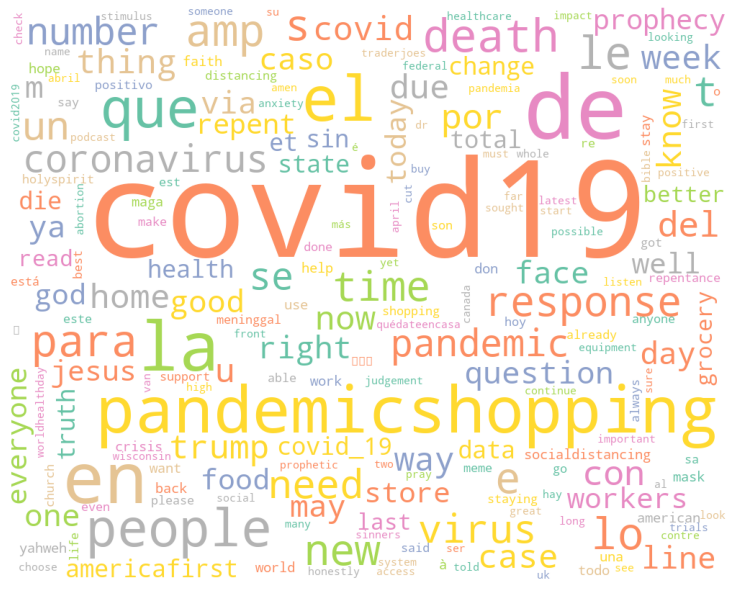

In [39]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [40]:
# get functionality of subjectivity and polarity 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [41]:
df1.dropna(subset=['cleaned_text'], inplace = True)
df1.reset_index(drop=True, inplace=True)

In [42]:
df1['Subjectivity'] = df1['cleaned_text'].apply(getSubjectivity)
df1['Polarity'] = df1['cleaned_text'].apply(getPolarity)
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity
0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0
1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0
2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2
3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2
4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9


In [43]:
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df1['Analysis_Polarity'] = df1['Polarity'].apply(get_Polarity_Analysis)

df1['Analysis_Subjectivity'] = df1['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df1.head(20)



,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.000000,0.000000,Neutral,Fact
1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.000000,0.000000,Neutral,Fact
2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.950000,-0.200000,Negative,Opinion
3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.950000,-0.200000,Negative,Opinion
4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.000000,0.900000,Positive,Opinion
5,5,1245496407454363648,1.585784e+12,2020-04-01 19:40:58,"Is it safe or even ethical to shop online during the pandemic? Amazon workers are falling sick and essentials are being prioritized, but what about Lego? Read more. #coronavirus #pandemicshopping #COVIDー19 https://t.co/DrfbDwzBEU https://t.co/R9zmmjy5IL",en,"['coronavirus', 'pandemicshopping', 'covidー19']",[],224675449,['https://www.ratemds.com/blog/should-i-shop-online-during-covid-19/'],False,"is safe even ethical shop online pandemic? amazon workers falling sick essentials prioritized, lego? read more. pandemicshopping covidー19",0.614286,0.121429,Positive,Opinion
6,6,1245710337367846913,1.585835e+12,2020-04-02 09:51:03,@dccampfin Well I won’t have to grocery shop again for awhile. I tried to buy enough for two weeks. Good selection at 6 am. Spent $250 - a new personal best. #PandemicShopping,en,['pandemicshopping'],[],802205991832027136,[],False,well i won’t grocery shop awhile. i tried buy enough two weeks. good selection 6 am. spent $250 - new personal best. pandemicshopping,0.375758,0.289394,Positive,Opinion
7,7,1245787585282179072,1.585854e+12,2020-04-02 14:58:00,I just went to the grocery store for bread. I ended up spending $50. #PandemicShopping,en,['pandemicshopping'],[],5814502,[],False,i went grocery store bread. i ended spending $50. pandemicshopping,0.000000,0.000000,Neutral,Fact
8,8,1245875432353705984,1.585875e+12,2020-04-02 20:47:04,So - anyone else finding themselves #PandemicShopping and purchasing food items at the grocery store that you would NEVER otherwise buy? I appear to have done this my last two trips...here’s a thread:,en,['pandemicshopping'],[],1164635432,[],False,so - anyone else finding pandemicshopping purchasing food items grocery store would never otherwise buy? i appear done last two trips...here’s thread

In [44]:
df1.to_csv("PolaritySubjectivityInnovation2_april9.csv")

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   id                     232 non-null    int64  
 2   created_at             232 non-null    float64
 3   date                   232 non-null    object 
 4   tweet                  232 non-null    object 
 5   language               232 non-null    object 
 6   hashtags               232 non-null    object 
 7   cashtags               232 non-null    object 
 8   user_id                232 non-null    int64  
 9   urls                   232 non-null    object 
 10  retweet                232 non-null    bool   
 11  cleaned_text           232 non-null    object 
 12  Subjectivity           232 non-null    float64
 13  Polarity               232 non-null    float64
 14  Analysis_Polarity      232 non-null    object 
 15  Analys

In [46]:
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0,Neutral,Fact
1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0,Neutral,Fact
2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9,Positive,Opinion


In [47]:
df2=pd.read_csv('PolaritySubjectivityInnovation2_april9.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0,Neutral,Fact
1,1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0,Neutral,Fact
2,2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
3,3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
4,4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9,Positive,Opinion


In [48]:
#provide graphing capability
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

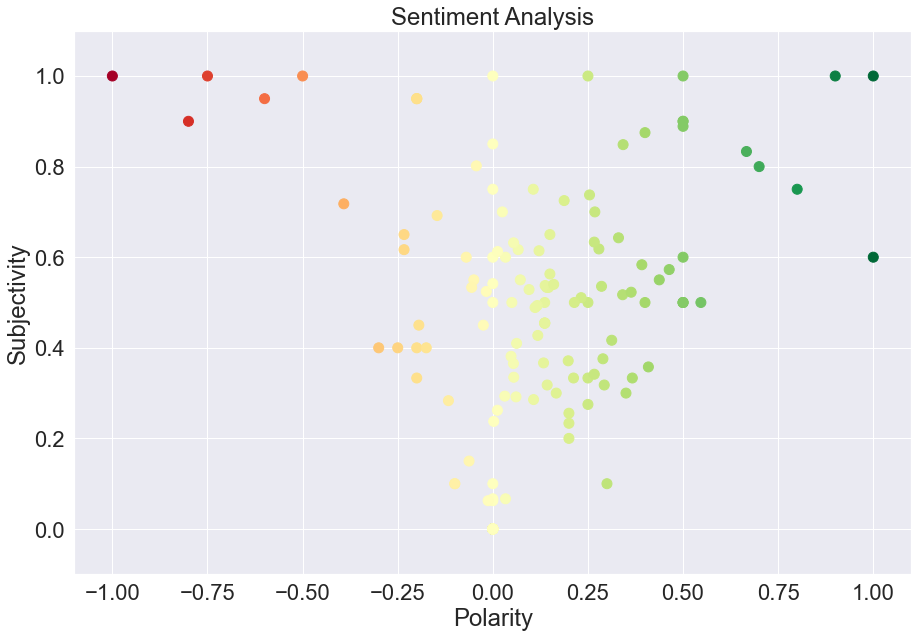

(None,)

In [49]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df2['Polarity'], df2['Subjectivity'], c=df2['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [50]:
# Show the value counts
df2['Analysis_Polarity'].value_counts()

Neutral     117
Positive     86
Negative     29
Name: Analysis_Polarity, dtype: int64

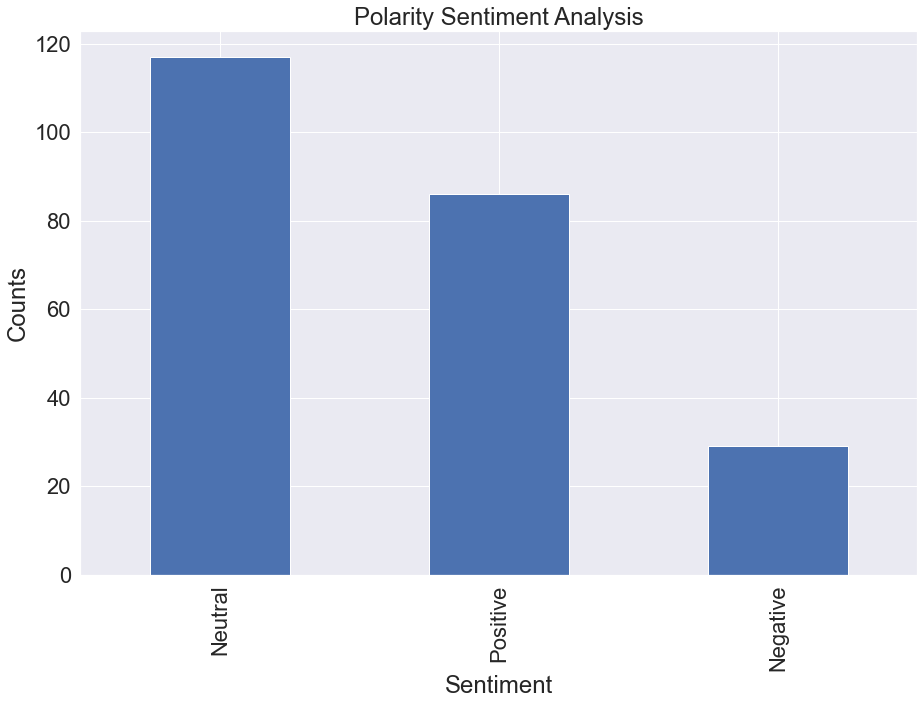

In [51]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

In [52]:
# Show the value counts
df2['Analysis_Subjectivity'].value_counts()

Opinion    124
Fact       108
Name: Analysis_Subjectivity, dtype: int64

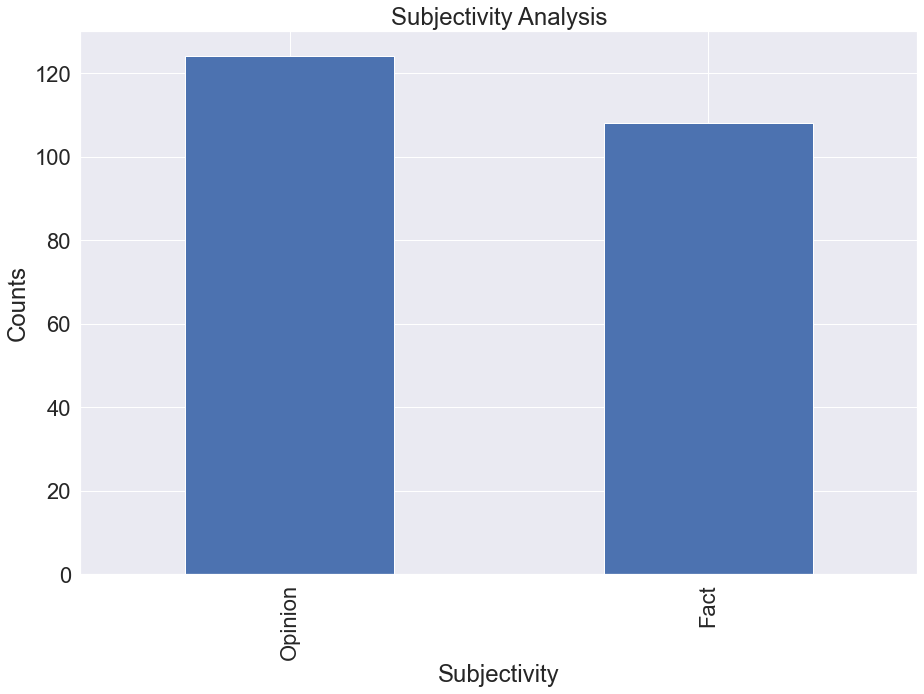

In [53]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Subjectivity')
plt.ylabel('Counts')
df2['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

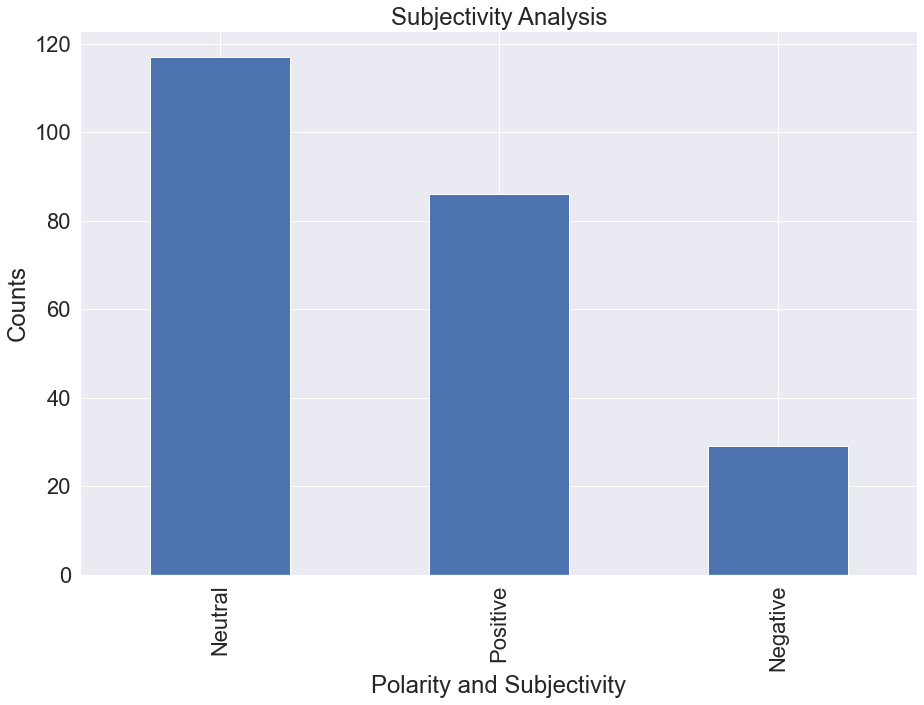

In [54]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Polarity and Subjectivity')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

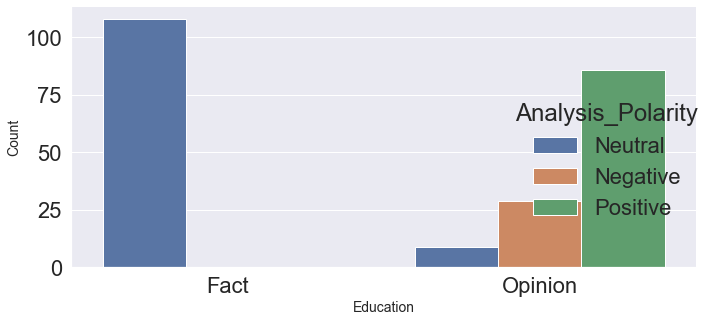

In [55]:
 sns.catplot( x='Analysis_Subjectivity',
             kind="count", 
             hue="Analysis_Polarity", 
             height=5, 
             aspect=1.5, 
             data=df2)
plt.xlabel("Education", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

In [56]:
import pyLDAvis
import gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\Amber\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

C:\Users\Amber\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [57]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(232, 9)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   Unnamed: 0.1           232 non-null    int64  
 2   id                     232 non-null    int64  
 3   created_at             232 non-null    float64
 4   date                   232 non-null    object 
 5   tweet                  232 non-null    object 
 6   language               232 non-null    object 
 7   hashtags               232 non-null    object 
 8   cashtags               232 non-null    object 
 9   user_id                232 non-null    int64  
 10  urls                   232 non-null    object 
 11  retweet                232 non-null    bool   
 12  cleaned_text           232 non-null    object 
 13  Subjectivity           232 non-null    float64
 14  Polarity               232 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
df2.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0,Neutral,Fact
1,1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0,Neutral,Fact
2,2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
3,3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
4,4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9,Positive,Opinion


In [60]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(232, 9)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Amber\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [61]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=5, random_state=50)

In [62]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['para', 'pandemicshopping', 'amp', 'pandemic', 'virus', 'coronavirus', 'people', 'like', 'que']


Top 10 words for topic #1:
['pandemic', 'para', 'people', 'like', 'pandemicshopping', 'que', 'coronavirus', 'virus', 'amp']


Top 10 words for topic #2:
['para', 'virus', 'amp', 'like', 'pandemic', 'que', 'pandemicshopping', 'people', 'coronavirus']


Top 10 words for topic #3:
['amp', 'people', 'coronavirus', 'like', 'pandemicshopping', 'virus', 'que', 'pandemic', 'para']


Top 10 words for topic #4:
['para', 'virus', 'que', 'like', 'amp', 'pandemic', 'coronavirus', 'people', 'pandemicshopping']




C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.176224  0.285571       1        1  28.141457
0      0.194445  0.102501       2        1  23.194687
3      0.267401 -0.128122       3        1  21.301464
1     -0.269330 -0.238773       4        1  19.311519
2     -0.016293 -0.021178       5        1   8.050873, topic_info=               Term       Freq      Total Category  logprob  loglift
4  pandemicshopping  25.000000  25.000000  Default   9.0000   9.0000
0               amp  15.000000  15.000000  Default   8.0000   8.0000
5              para  15.000000  15.000000  Default   7.0000   7.0000
8             virus  12.000000  12.000000  Default   6.0000   6.0000
7               que  23.000000  23.000000  Default   5.0000   5.0000
2              like  14.000000  14.000000  Default   4.0000   4.0000
3          pandemic  11.000000  11.000000  Default   3.0000   3.0000
6            people  17.000000  17.000000  Default   2.0000   2.0000
1       coronavirus   9.000000   9.000000  Default   1.0000   1.0000
4  pandemicshopping  23.622751  25.529881   Topic1  -0.5671   1.1903
6            people  11.140179  17.600205   Topic1  -1.3187   0.8106
1       coronavirus   6.004336   9.910267   Topic1  -1.9368   0.7668
3          pandemic   0.147404  11.957335   Topic1  -5.6439  -3.1280
8             virus   0.146752  12.956850   Topic1  -5.6483  -3.2127
2              like   0.146932  14.759403   Topic1  -5.6471  -3.3417
0               amp   0.147347  15.932754   Topic1  -5.6443  -3.4154
5              para   0.146749  15.919684   Topic1  -5.6483  -3.4187
7               que   0.146906  23.433620   Topic1  -5.6472  -3.8042
2              like  12.893282  14.759403   Topic2  -0.9793   1.3261
7               que  15.606164  23.433620   Topic2  -0.7883   1.0547
6            people   4.735336  17.600205   Topic2  -1.9809   0.1484
1       coronavirus   0.183530   9.910267   Topic2  -5.2313  -2.5277
3          pandemic   0.182046  11.957335   Topic2  -5.2395  -2.7236
8             virus   0.182253  12.956850   Topic2  -5.2383  -2.8027
0               amp   0.182006  15.932754   Topic2  -5.2397  -3.0108
5              para   0.181635  15.919684   Topic2  -5.2417  -3.0121
4  pandemicshopping   0.181885  25.529881   Topic2  -5.2403  -3.4830
5              para  14.072655  15.919684   Topic3  -0.8066   1.4231
3          pandemic  10.106771  11.957335   Topic3  -1.1376   1.3783
7               que   6.154870  23.433620   Topic3  -1.6336   0.2095
1       coronavirus   0.198293   9.910267   Topic3  -5.0688  -2.3652
8             virus   0.199232  12.956850   Topic3  -5.0641  -2.6285
2              like   0.198681  14.759403   Topic3  -5.0669  -2.7615
0               amp   0.198242  15.932754   Topic3  -5.0691  -2.8402
6            people   0.198280  17.600205   Topic3  -5.0689  -2.9396
4  pandemicshopping   0.199143  25.529881   Topic3  -5.0646  -3.3072
0               amp  14.083784  15.932754   Topic4  -0.7077   1.5211
8             virus  11.107522  12.956850   Topic4  -0.9451   1.4905
1       coronavirus   2.194565   9.910267   Topic4  -2.5668   0.1369
3          pandemic   0.198428  11.957335   Topic4  -4.9701  -2.4542
2              like   0.198906  14.759403   Topic4  -4.9677  -2.6623
5              para   0.198587  15.919684   Topic4  -4.9693  -2.7396
6            people   0.198757  17.600205   Topic4  -4.9684  -2.8391
7               que   0.201267  23.433620   Topic4  -4.9559  -3.1128
4  pandemicshopping   0.199234  25.529881   Topic4  -4.9660  -3.2087
1       coronavirus   1.329544   9.910267   Topic5  -2.1930   0.5107
3          pandemic   1.322686  11.957335   Topic5  -2.1982   0.3177
8             virus   1.321092  12.956850   Topic5  -2.1994   0.2362
2              like   1.321601  14.759403   Topic5  -2.1990   0.1064
0               amp   1.321375  15.932754   Topic5  -2.1991   0.0297
5              para   1.320059  15.919684   Topic5  -2.2001 

In [64]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(232, 5)

In [65]:
df2.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0,Neutral,Fact
1,1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0,Neutral,Fact
2,2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
3,3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion
4,4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9,Positive,Opinion


In [66]:
df2['Topic'] = topic_values.argmax(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   Unnamed: 0.1           232 non-null    int64  
 2   id                     232 non-null    int64  
 3   created_at             232 non-null    float64
 4   date                   232 non-null    object 
 5   tweet                  232 non-null    object 
 6   language               232 non-null    object 
 7   hashtags               232 non-null    object 
 8   cashtags               232 non-null    object 
 9   user_id                232 non-null    int64  
 10  urls                   232 non-null    object 
 11  retweet                232 non-null    bool   
 12  cleaned_text           232 non-null    object 
 13  Subjectivity           232 non-null    float64
 14  Polarity               232 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
df4=df2
df4.head()
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   Unnamed: 0.1           232 non-null    int64  
 2   id                     232 non-null    int64  
 3   created_at             232 non-null    float64
 4   date                   232 non-null    object 
 5   tweet                  232 non-null    object 
 6   language               232 non-null    object 
 7   hashtags               232 non-null    object 
 8   cashtags               232 non-null    object 
 9   user_id                232 non-null    int64  
 10  urls                   232 non-null    object 
 11  retweet                232 non-null    bool   
 12  cleaned_text           232 non-null    object 
 13  Subjectivity           232 non-null    float64
 14  Polarity               232 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
df4['Topic']=df4['Topic'].replace({0:'pandemicshopping',1:'que',2:'para',3:'amp',4:'coronavirus'})

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
df4.head()
df4.info()
df4['Topic'].head(20)
#df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   Unnamed: 0.1           232 non-null    int64  
 2   id                     232 non-null    int64  
 3   created_at             232 non-null    float64
 4   date                   232 non-null    object 
 5   tweet                  232 non-null    object 
 6   language               232 non-null    object 
 7   hashtags               232 non-null    object 
 8   cashtags               232 non-null    object 
 9   user_id                232 non-null    int64  
 10  urls                   232 non-null    object 
 11  retweet                232 non-null    bool   
 12  cleaned_text           232 non-null    object 
 13  Subjectivity           232 non-null    float64
 14  Polarity               232 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0     coronavirus
1     coronavirus
2     coronavirus
3     coronavirus
4     coronavirus
5     coronavirus
6     coronavirus
7     coronavirus
8     coronavirus
9     coronavirus
10    coronavirus
11    coronavirus
12    coronavirus
13    coronavirus
14    coronavirus
15            que
16    coronavirus
17    coronavirus
18    coronavirus
19    coronavirus
Name: Topic, dtype: object

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 2880x1800 with 0 Axes>

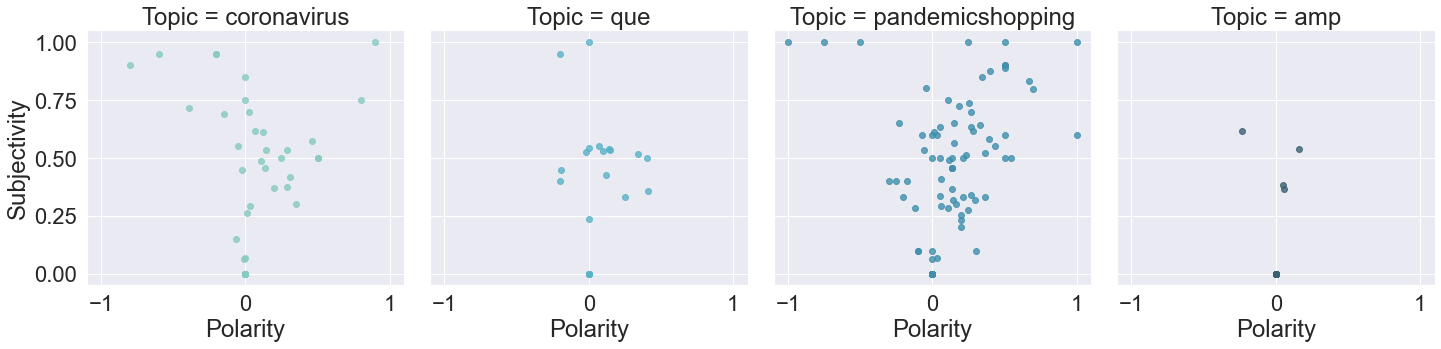

In [71]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df4, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [72]:
#create output file for SAS
df4.head()

df4.to_csv("PolaritySubjectivity_topic_april9.csv")


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
#df4.to_csv("PolaritySubjectivity_topic_mar16.csv")

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
df4_1 = df4.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df4_1

#df2['Total'] = df2.sum(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
amp,1,12,3
coronavirus,10,20,19
pandemicshopping,14,79,54
que,4,6,10


In [75]:
df4_1['Total'] = df4_1.sum(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
df4_1.columns

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [77]:
for i in df4_1:
    df4_1[i] = round(df4_1[i]*100/df4_1.Total)

df4_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
amp,6.0,75.0,19.0,100.0
coronavirus,20.0,41.0,39.0,100.0
pandemicshopping,10.0,54.0,37.0,100.0
que,20.0,30.0,50.0,100.0


In [78]:
df4=df4.fillna(0)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
df4.head()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             232 non-null    int64  
 1   Unnamed: 0.1           232 non-null    int64  
 2   id                     232 non-null    int64  
 3   created_at             232 non-null    float64
 4   date                   232 non-null    object 
 5   tweet                  232 non-null    object 
 6   language               232 non-null    object 
 7   hashtags               232 non-null    object 
 8   cashtags               232 non-null    object 
 9   user_id                232 non-null    int64  
 10  urls                   232 non-null    object 
 11  retweet                232 non-null    bool   
 12  cleaned_text           232 non-null    object 
 13  Subjectivity           232 non-null    float64
 14  Polarity               232 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
#df4= df4.drop(['Total'], axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
df4.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,0,0,1245160996739694592,1.585704e+12,2020-03-31 21:28:10,#heb https://t.co/VMU1CVzgQ7 #PANDEMICSHOPPING 🚲 #JAMESBOND #coronavirus 🌋 https://t.co/I9zuPvWXhI,und,"['heb', 'pandemicshopping', 'jamesbond', 'coronavirus']",[],979779408,['https://youtu.be/CWV97wNCUZs'],False,heb pandemicshopping jamesbond,0.00,0.0,Neutral,Fact,coronavirus
1,1,1,1245223579249258497,1.585719e+12,2020-04-01 01:36:51,"the majestic Brooklyn Bridge today. no cars. 43,000+ cases as I write this. #covid-19 #nyccoronavirus 💔 - - - - #thechickwhoclicks #thestreetartchick #photojournalism #nyc #foodshopping #pandemicshopping #supplyrun… https://t.co/0ZbsBykSz2",en,"['covid', 'nyccoronavirus', 'thechickwhoclicks', 'thestreetartchick', 'photojournalism', 'nyc', 'foodshopping', 'pandemicshopping', 'supplyrun']",[],207842216,['https://www.instagram.com/p/B-bT-73HGi-/?igshid=11gk8r9iaoi7h'],False,"majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…",0.00,0.0,Neutral,Fact,coronavirus
2,2,2,1245325802448642050,1.585744e+12,2020-04-01 08:23:02,@theimpulsivebuy I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion,coronavirus
3,3,3,1245325841304821761,1.585744e+12,2020-04-01 08:23:12,I honestly thought this movie had already come out but when I was #PandemicShopping I spotted all these terrible tie-ins for it.,en,['pandemicshopping'],[],14830583,[],False,i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.,0.95,-0.2,Negative,Opinion,coronavirus
4,4,4,1245369304050216961,1.585754e+12,2020-04-01 11:15:54,This is brilliant ..... #pandemicshopping,en,['pandemicshopping'],[],20971849,[],False,this brilliant ..... pandemicshopping,1.00,0.9,Positive,Opinion,coronavirus


In [82]:
df4_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
amp,6.0,75.0,19.0,100.0
coronavirus,20.0,41.0,39.0,100.0
pandemicshopping,10.0,54.0,37.0,100.0
que,20.0,30.0,50.0,100.0


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



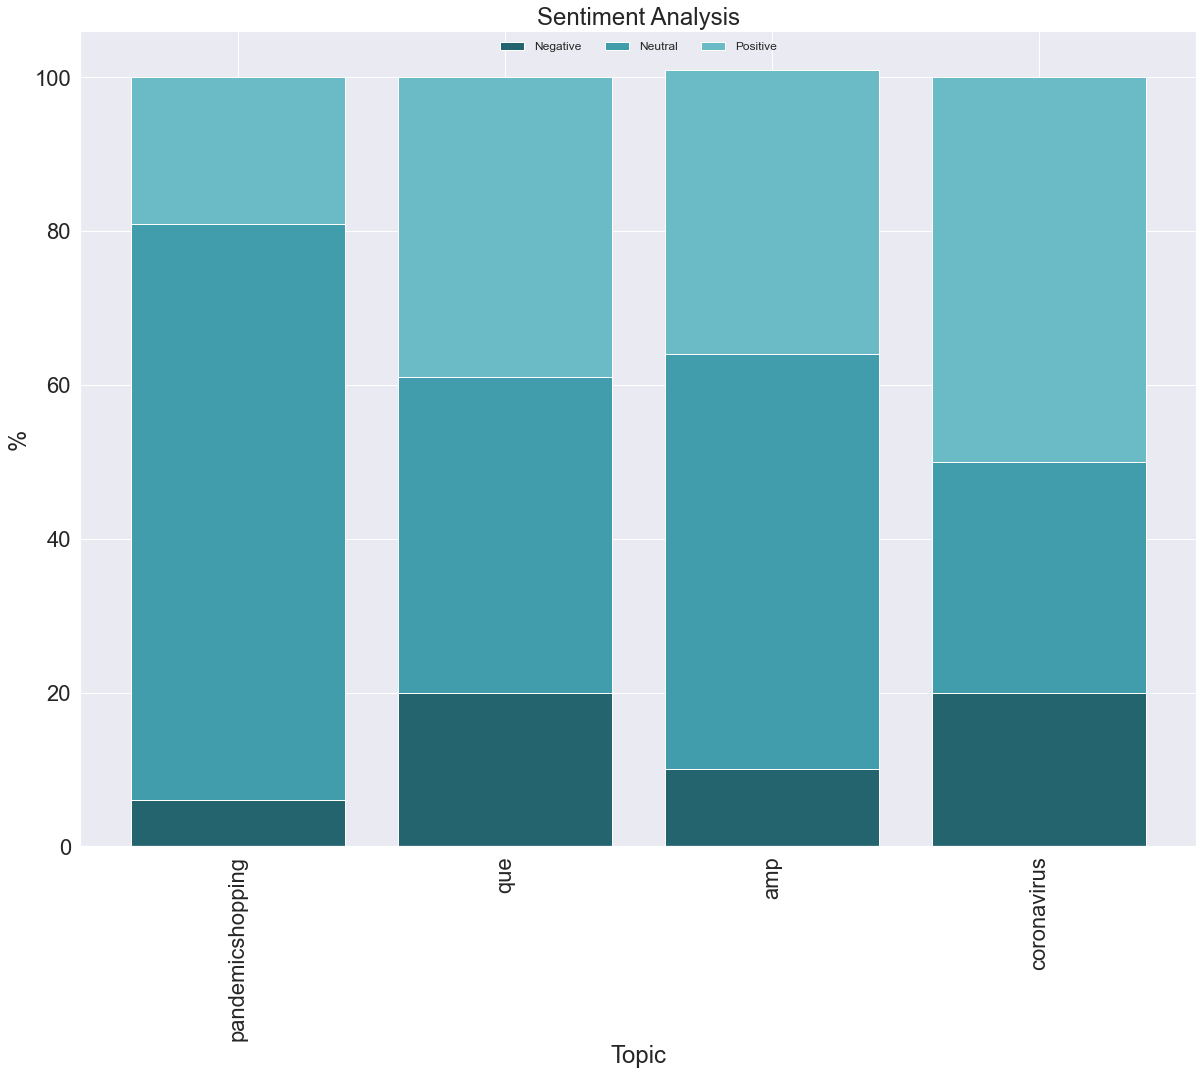

In [86]:
plt.figure(figsize=(20,15)) 


topic = ['pandemicshopping','que','amp','coronavirus']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df4_1['Negative'], color='#23646e')
p2=plt.bar(topic,df4_1['Neutral'], color='#419dab', bottom=df4_1['Negative'])
p3=plt.bar(topic,df4_1['Positive'], color='#6bbbc7', bottom=df4_1['Neutral']+df4_1['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [87]:
df4['Topic'].value_counts()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



pandemicshopping    147
coronavirus          49
que                  20
amp                  16
Name: Topic, dtype: int64

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='Topic', ylabel='count'>

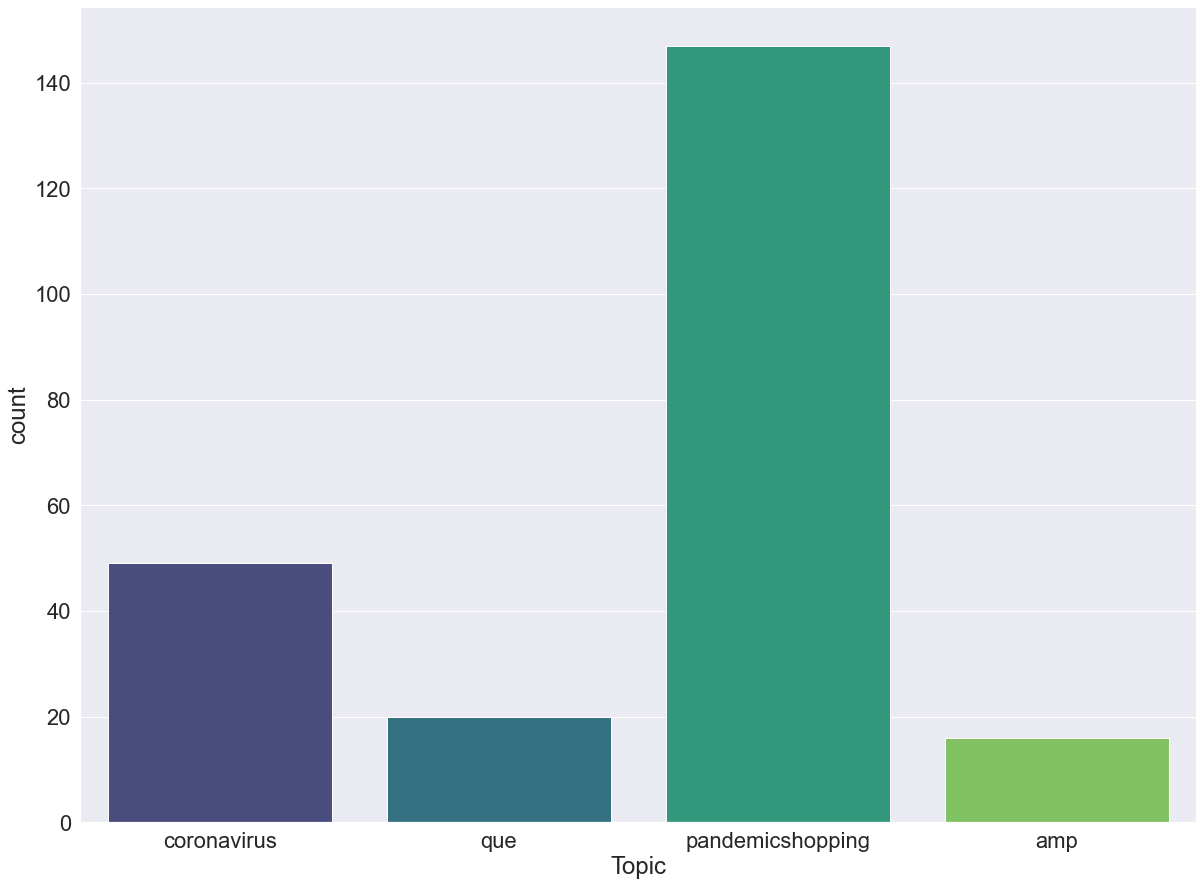

In [88]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df4, palette = 'viridis')


In [89]:
#df4.head()
rng = pd.date_range(start='01/09/2020', end ='30/11/2020',freq='D')


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
df5_1 = df4.groupby(['date','Topic'])['cleaned_text'].count().reset_index()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
df5_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,date,Topic,cleaned_text
0,2020-03-31 21:28:10,coronavirus,1
1,2020-04-01 01:36:51,coronavirus,1
2,2020-04-01 08:23:02,coronavirus,1
3,2020-04-01 08:23:12,coronavirus,1
4,2020-04-01 11:15:54,coronavirus,1
...,...,...,...
126,2020-04-07 19:59:57,pandemicshopping,4
127,2020-04-07 19:59:58,amp,1
128,2020-04-07 19:59:58,pandemicshopping,1
129,2020-04-07 19:59:59,amp,1


In [92]:
pivoted = df5_1.pivot( index='date',columns='Topic', values='cleaned_text').reset_index()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
pivoted=pivoted.fillna(0)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
pivoted.to_csv("tweets1_by_date_april10.csv")

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



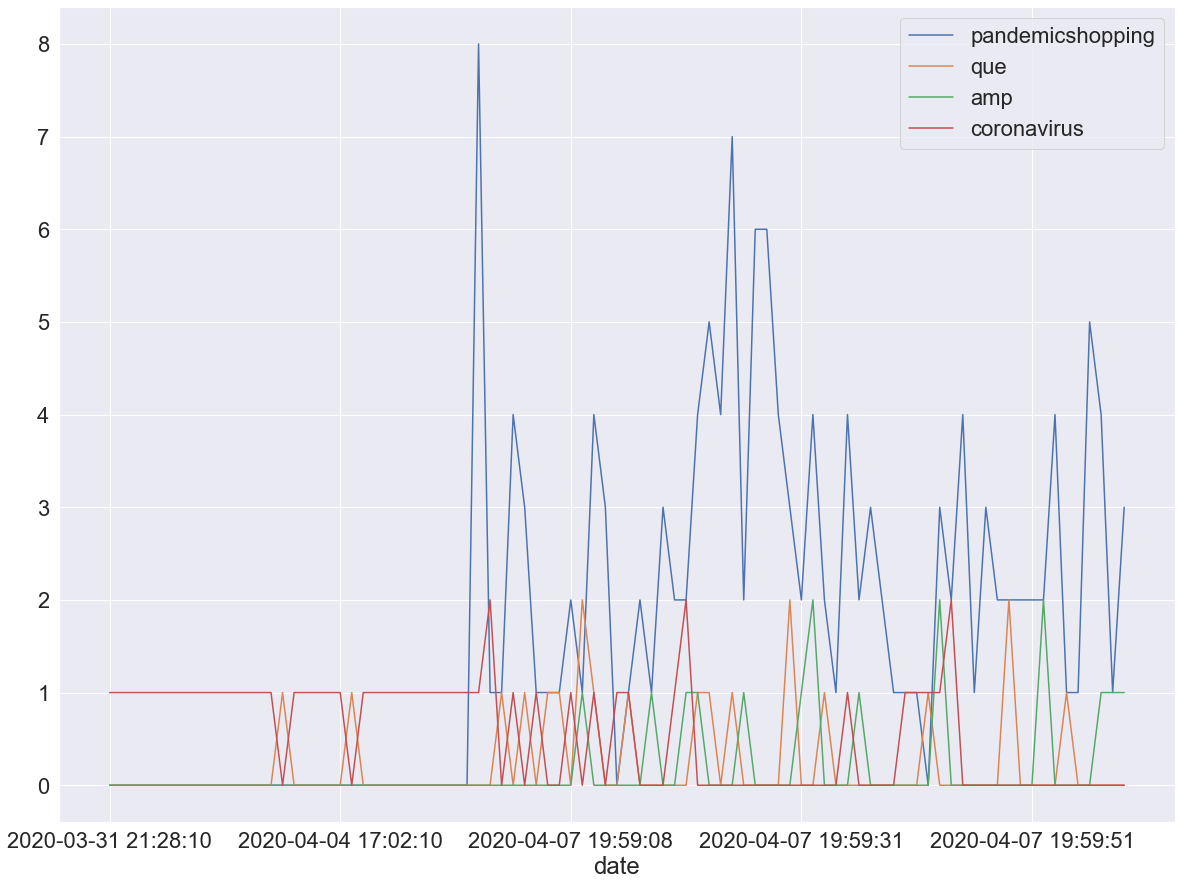

In [96]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='date', y='pandemicshopping', label='pandemicshopping',ax=ax)
pivoted.plot(kind='line', x='date', y='que', label='que',ax=ax)
pivoted.plot(kind='line', x='date', y='amp', label='amp',ax=ax)
pivoted.plot(kind='line', x='date', y='coronavirus', label='coronavirus',ax=ax)


# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



In [97]:
# # Preparing a corpus for analysis and checking first 10 entries
corpus=[]
a=[]
for i in range(len(df4['cleaned_text'])):
    a=df4['cleaned_text'][i]
    corpus.append(a)
        
print(corpus[0:10])

['heb pandemicshopping jamesbond', 'majestic brooklyn bridge today. cars. 43,000+ cases i write this. nyc - - - - thechickwhoclicks thestreetartchick photojournalism nyc foodshopping pandemicshopping supplyrun…', 'i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.', 'i honestly thought movie already e i pandemicshopping i spotted terrible tie-ins it.', 'this brilliant ..... pandemicshopping', 'is safe even ethical shop online pandemic? amazon workers falling sick essentials prioritized, lego? read more. pandemicshopping covidー19', 'well i won’t grocery shop awhile. i tried buy enough two weeks. good selection 6 am. spent $250 - new personal best. pandemicshopping', 'i went grocery store bread. i ended spending $50. pandemicshopping', 'so - anyone else finding pandemicshopping purchasing food items grocery store would never otherwise buy? i appear done last two trips...here’s thread:', 'so - 1 3. not best score...but weeks this, i certain there’s weird 

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [99]:
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
corpus = [dictionary.doc2bow(text) for text in texts]

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [101]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [102]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [103]:
total_topics = 5

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,5)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.014*"covid19" + 0.005*"covid19." + 0.005*"pandemicshopping" + 0.003*"&amp;" + 0.003*"et"'),
 (1, '0.029*"covid19" + 0.017*"de" + 0.011*"el" + 0.011*"en" + 0.011*"que"'),
 (2,
  '0.023*"covid19" + 0.010*"pandemicshopping" + 0.006*"de" + 0.005*"new" + 0.004*"en"'),
 (3,
  '0.022*"covid19" + 0.012*"de" + 0.006*"covid19." + 0.004*"coronavirus" + 0.003*"deaths"'),
 (4,
  '0.033*"covid19" + 0.007*"en" + 0.007*"de" + 0.006*"la" + 0.004*"people"')]

In [104]:
total_topics = 8

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,8)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.021*"covid19" + 0.010*"de" + 0.008*"en" + 0.007*"deaths" + 0.005*"pandemicshopping" + 0.005*"coronavirus" + 0.005*"total" + 0.005*"people"'),
 (1,
  '0.020*"covid19" + 0.005*"covid19." + 0.005*"pandemicshopping" + 0.004*"people" + 0.003*"use" + 0.003*"tracking" + 0.003*"bargain" + 0.003*"les"'),
 (2,
  '0.020*"covid19" + 0.013*"pandemicshopping" + 0.006*"en" + 0.005*"need" + 0.005*"covid19," + 0.005*"covid19." + 0.004*"de" + 0.004*"last"'),
 (3,
  '0.040*"covid19" + 0.014*"de" + 0.011*"el" + 0.009*"en" + 0.008*"la" + 0.006*"people" + 0.006*"que" + 0.005*"para"'),
 (4,
  '0.018*"covid19" + 0.012*"de" + 0.007*"en" + 0.006*"la" + 0.005*"️" + 0.005*"pandemicshopping" + 0.005*"el" + 0.005*"con"'),
 (5,
  '0.030*"covid19" + 0.006*"de" + 0.006*"pandemicshopping" + 0.005*"get" + 0.005*"que" + 0.004*"coronavirus" + 0.004*"food" + 0.004*"1"'),
 (6,
  '0.020*"covid19" + 0.004*"death" + 0.004*"like" + 0.004*"get" + 0.003*"sin" + 0.003*"repentance" + 0.003*"faith" + 0.003*"people"'),
 (7,

In [105]:
data_lda = {i: OrderedDict(lda.show_topic(i,5)) for i in range(total_topics)}
data_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{0: OrderedDict([('covid19', 0.02128323),
              ('de', 0.009767181),
              ('en', 0.007508533),
              ('deaths', 0.007480295),
              ('pandemicshopping', 0.005470628)]),
 1: OrderedDict([('covid19', 0.020177608),
              ('covid19.', 0.005160749),
              ('pandemicshopping', 0.0051412294),
              ('people', 0.0042516063),
              ('use', 0.0033754632)]),
 2: OrderedDict([('covid19', 0.02042361),
              ('pandemicshopping', 0.012916957),
              ('en', 0.0055778665),
              ('need', 0.0053778826),
              ('covid19,', 0.004667253)]),
 3: OrderedDict([('covid19', 0.040459413),
              ('de', 0.013512242),
              ('el', 0.0107848),
              ('en', 0.008687909),
              ('la', 0.008369294)]),
 4: OrderedDict([('covid19', 0.017720098),
              ('de', 0.011570178),
              ('en', 0.006836537),
              ('la', 0.0056029893),
              ('️', 0.0054580807)]),
 5: Orde

In [106]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(8, 18)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
df_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,covid19,de,en,deaths,pandemicshopping,covid19.,people,use,need,"covid19,",el,la,️,get,que,death,like,sin
0,0.021283,0.009767,0.007509,0.00748,0.005471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.020178,0.000000,0.000000,0.00000,0.005141,0.005161,0.004252,0.003375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.020424,0.000000,0.005578,0.00000,0.012917,0.000000,0.000000,0.000000,0.005378,0.004667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.040459,0.013512,0.008688,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010785,0.008369,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.017720,0.011570,0.006837,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005603,0.005458,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.030096,0.006091,0.000000,0.00000,0.005901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005119,0.004969,0.000000,0.000000,0.00000
6,0.019862,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003735,0.000000,0.004466,0.003861,0.00345
7,0.020222,0.020799,0.011378,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007545,0.015230,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [108]:
try_lda=df_lda.T

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
try_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7
covid19,0.021283,0.020178,0.020424,0.040459,0.017720,0.030096,0.019862,0.020222
de,0.009767,0.000000,0.000000,0.013512,0.011570,0.006091,0.000000,0.020799
en,0.007509,0.000000,0.005578,0.008688,0.006837,0.000000,0.000000,0.011378
deaths,0.007480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pandemicshopping,0.005471,0.005141,0.012917,0.000000,0.000000,0.005901,0.000000,0.000000
covid19.,0.000000,0.005161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
people,0.000000,0.004252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
use,0.000000,0.003375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
need,0.000000,0.000000,0.005378,0.000000,0.000000,0.000000,0.000000,0.000000
"covid19,",0.000000,0.000000,0.004667,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Amber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 65039 missing from current font.

C:\Users\Amber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 65039 missing from current font.



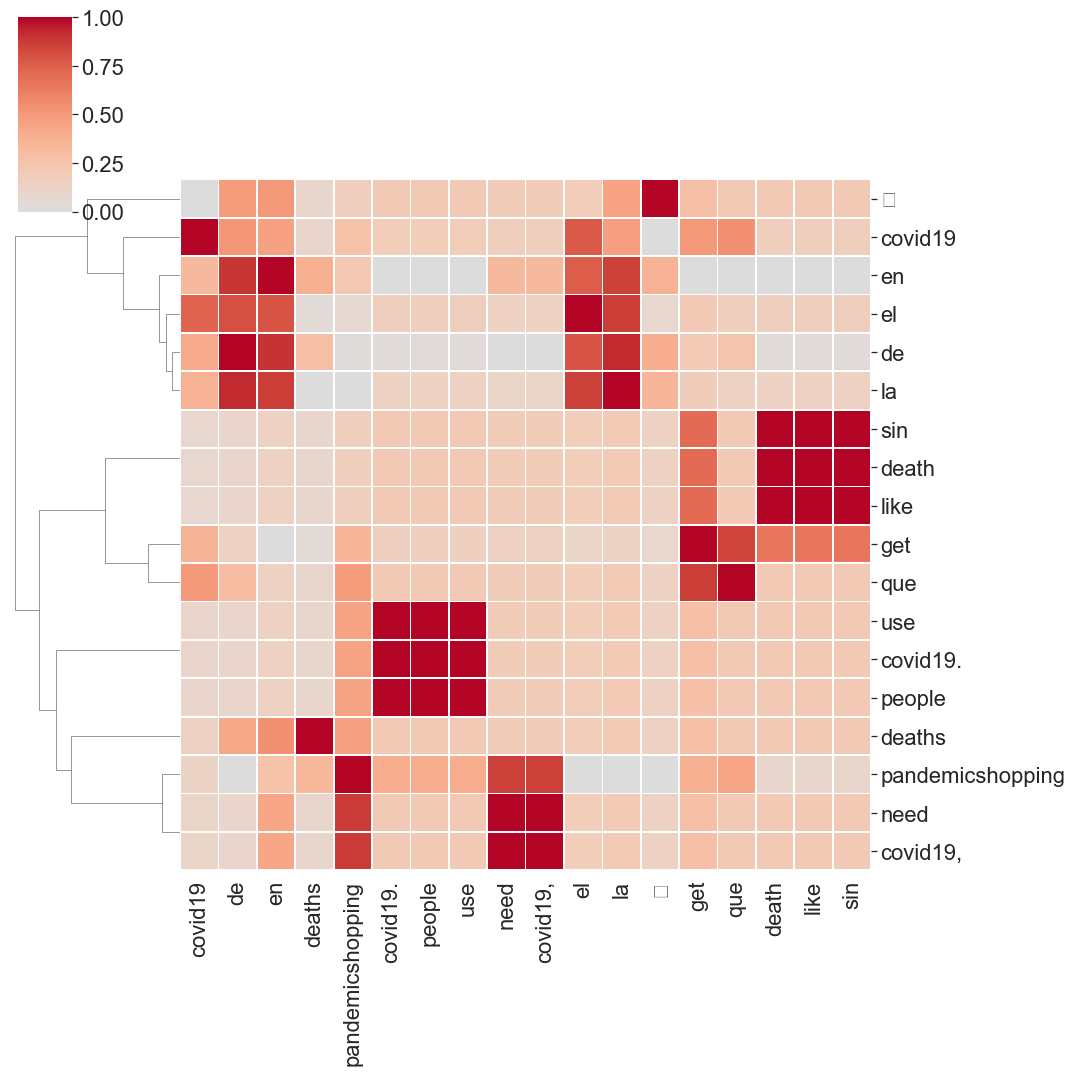

In [110]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
dataset = pd.read_csv('tweets1_by_date_april10.csv')


In [117]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,89.0,44.000000,25.836021,0.0,22.0,44.0,66.0,88.0
amp,89.0,0.179775,0.466169,0.0,0.0,0.0,0.0,2.0
coronavirus,89.0,0.550562,0.564302,0.0,0.0,1.0,1.0,2.0
pandemicshopping,89.0,1.651685,1.846995,0.0,0.0,1.0,3.0,8.0
que,89.0,0.224719,0.494350,0.0,0.0,0.0,0.0,2.0


In [118]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['amp', 'coronavirus', 'pandemicshopping', 'que'], dtype='object')


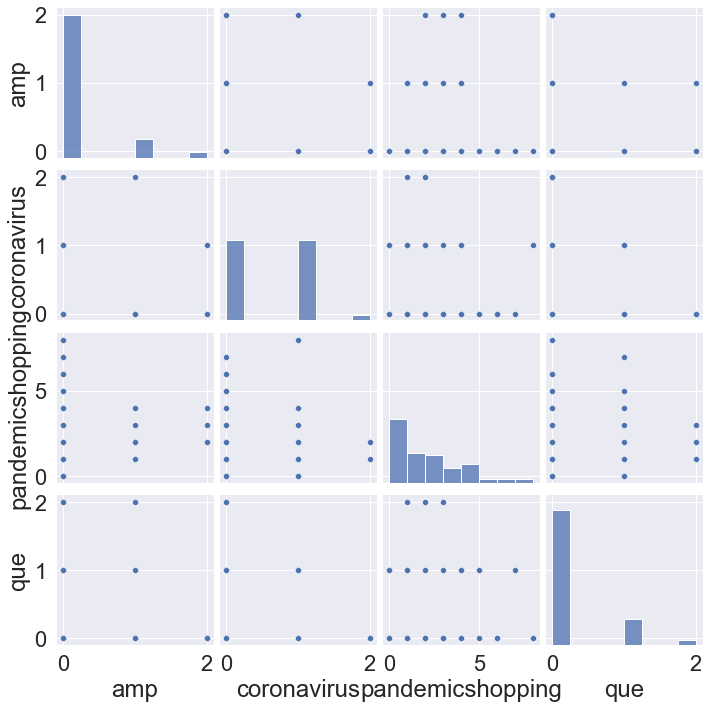

In [120]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['amp','coronavirus','pandemicshopping','que']])

plt.show()

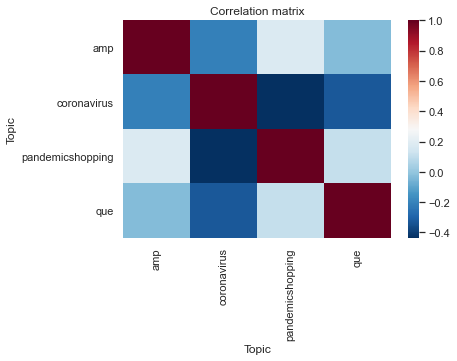

In [121]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()

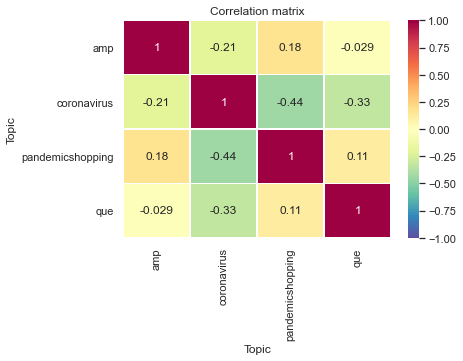

In [122]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

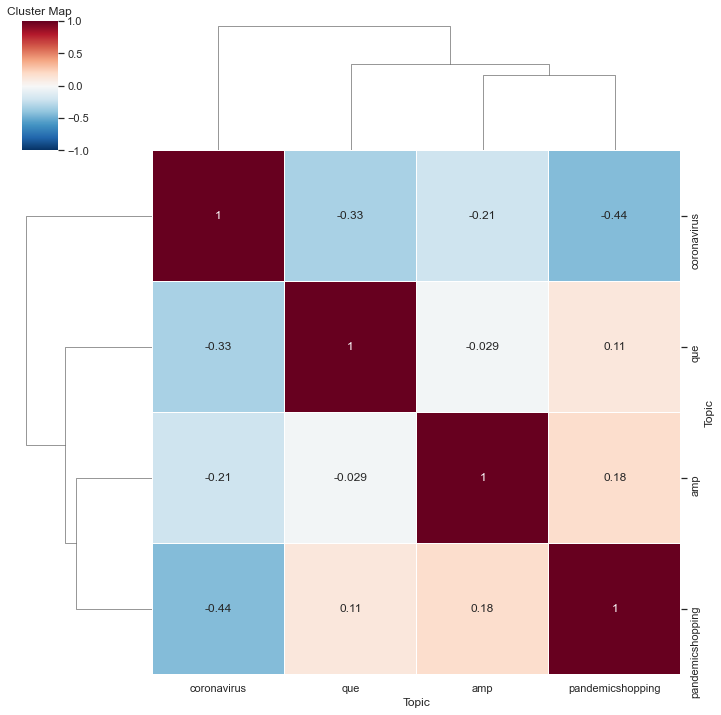

In [123]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='RdBu_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()